# GQN Dataset Viewer
Allows to iterate over a GQN dataset with the gqn_input_fn.

In [1]:
'''imports'''
# stdlib
import os
import sys
# numerical computing
import numpy as np
import tensorflow as tf
# plotting
import imageio
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from IPython.display import Image, display
# GQN src
root_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_path)
from data_provider.gqn_provider_base_tf2 import EagerDataReader

In [2]:
'''directory setup'''
data_dir = os.path.join(root_path, 'data')
model_dir = os.path.join(root_path, 'models')
tmp_dir = os.path.join(root_path, 'notebooks', 'tmp')
# dataset flags
dataset_name = 'rooms_ring_camera'  # one of the GQN dataset names
data_path = os.path.join(data_dir, dataset_name)
print("Data path: %s" % (data_path, ))
# tmp
notebook_name = 'gqn_dataset'
notebook_tmp_path = os.path.join(tmp_dir, notebook_name)
os.makedirs(notebook_tmp_path, exist_ok=True)
print("Tmp path: %s" % (notebook_tmp_path, ))

Data path: /Users/Matthew/Documents/Projects/tf-gqn/data/rooms_ring_camera
Tmp path: /Users/Matthew/Documents/Projects/tf-gqn/notebooks/tmp/gqn_dataset


In [3]:
'''data reader setup'''
mode = "train"  # one of the tf.estimator.ModeKeys: TRAIN or EVAL
ctx_size=5
batch_size=10

data_reader = EagerDataReader(
        dataset=dataset_name, context_size=ctx_size, rootdir=data_dir, mode=mode,
         batch_size=batch_size, num_epochs=1,
        num_threads=4, buffer_size=1
)

In [4]:
data_reader.dataset

<PrefetchDataset shapes: TaskData(query=Query(context=Context(frames=(None, None, 5, 64, 64, 3), cameras=(None, 1, 5, 7)), query_camera=(None, 1, 7)), target=(None, None, 64, 64, 3)), types: TaskData(query=Query(context=Context(frames=tf.float32, cameras=tf.float32), query_camera=tf.float32), target=tf.float32)>

In [5]:
for d in data_reader.dataset:
    ctx_frames = d.query.context.frames
    ctx_poses = d.query.context.cameras
    tgt_frame = d.target
    tgt_pose = d.query.query_camera
    tuple_length = ctx_size + 1  # context points + 1 target
    print(">>> Context frames:\t%s" % (ctx_frames.shape, ))
    print(">>> Context poses: \t%s" % (ctx_poses.shape, ))
    print(">>> Target frame:  \t%s" % (tgt_frame.shape, ))
    print(">>> Target pose:   \t%s" % (tgt_pose.shape, ))

>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Targe

>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Targe

>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Targe

>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Targe

>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Targe

>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Target pose:   	(10, 1, 7)
>>> Context frames:	(10, 1, 5, 64, 64, 3)
>>> Context poses: 	(10, 1, 5, 7)
>>> Target frame:  	(10, 1, 64, 64, 3)
>>> Targe

TypeError: Invalid shape (5, 64, 64, 3) for image data

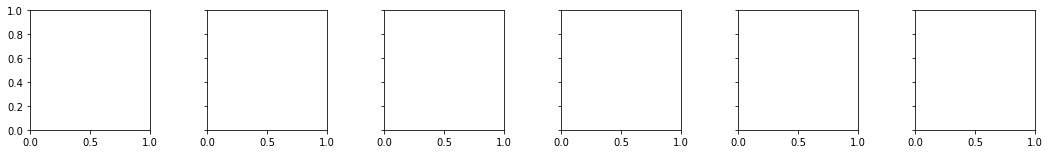

In [9]:
'''data visualization'''
skip_load = 1  # adjust this to skip through records

# fetch & parse
# for _ in range(skip_load):
#     d, _ = sess.run(data)
# ctx_frames = d.query.context.frames
# ctx_poses = d.query.context.cameras
# tgt_frame = d.target
# tgt_pose = d.query.query_camera
# tuple_length = ctx_size + 1  # context points + 1 target
# print(">>> Context frames:\t%s" % (ctx_frames.shape, ))
# print(">>> Context poses: \t%s" % (ctx_poses.shape, ))
# print(">>> Target frame:  \t%s" % (tgt_frame.shape, ))
# print(">>> Target pose:   \t%s" % (tgt_pose.shape, ))

# visualization constants
MAX_COLS_PER_ROW = 6
TILE_HEIGHT, TILE_WIDTH, TILE_PAD = 3.0, 3.0, 0.8
np.set_printoptions(precision=2, suppress=True)

# visualize all data tuples in the batch
for n in range(batch_size):
    # define image grid
    ncols = int(np.min([tuple_length, MAX_COLS_PER_ROW]))
    nrows = int(np.ceil(tuple_length / MAX_COLS_PER_ROW))
    fig = plt.figure(figsize=(TILE_WIDTH * ncols, TILE_HEIGHT * nrows))
    grid = ImageGrid(
        fig, 111,  # similar to subplot(111)
        nrows_ncols=(nrows, ncols),
        axes_pad=TILE_PAD,  # pad between axes in inch.
    )
    # visualize context
    for ctx_idx in range(ctx_size):
        rgb = ctx_frames[n, ctx_idx]
        pose = ctx_poses[n, ctx_idx]
        caption = "ctx: %02d\nxyz:%s\nyp:%s" % \
            (ctx_idx + 1, pose[0:3], pose[3:])
        grid[ctx_idx].imshow(rgb)
        grid[ctx_idx].set_title(caption, loc='center')
    # visualize target
    rgb = tgt_frame[n]
    pose = tgt_pose[n]
    caption = "target\nxyz:%s\nyp:%s" % \
        (pose[0:3], pose[3:])
    grid[-1].imshow(rgb)
    grid[-1].set_title(caption, loc='center')
    plt.show()